# Информация по библиотеке SKLearn

> Indented block



In [1]:
import sklearn

Изученные нами модули SKLearn:

#### 1. sklearn.metrics: 

https://scikit-learn.org/stable/modules/classes.html


модуль, где находятся множество метрик, используемых в задачах машинного обучения как для классификации, так и для регрессии:

In [4]:
# вывод этой ячейки покажет все, что содержит модуль metrics
sklearn.metrics.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__path__',
 '__file__',
 '__cached__',
 '__builtins__',
 '_base',
 '_ranking',
 'auc',
 'average_precision_score',
 'coverage_error',
 'dcg_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'ndcg_score',
 'precision_recall_curve',
 'roc_auc_score',
 'roc_curve',
 '_classification',
 'accuracy_score',
 'balanced_accuracy_score',
 'classification_report',
 'cohen_kappa_score',
 'confusion_matrix',
 'f1_score',
 'fbeta_score',
 'hamming_loss',
 'hinge_loss',
 'jaccard_score',
 'log_loss',
 'matthews_corrcoef',
 'precision_recall_fscore_support',
 'precision_score',
 'recall_score',
 'zero_one_loss',
 'brier_score_loss',
 'multilabel_confusion_matrix',
 '_pairwise_fast',
 'pairwise',
 'cluster',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'completeness_score',
 'consensus_score',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'mutual_info_score',
 'normalized_mutual_inf

Метрики обычно принимают два параметра -- вектор правильных оветов на данные и вектор предсказаний алгоритма, и выдают число -- значение метрики.

In [3]:
from sklearn.metrics import accuracy_score
y_true = [1, 2, 3]
y_pred = [1, 2, 5]
accuracy_score(y_true, y_pred)

0.6666666666666666

#### 2. sklearn.neighbors

Модуль, где находятся модели ближайших соседей для задач регрессии, так и для классификации. 

In [7]:
# вывод этой ячейки покажет все, что содержит модуль neighbors
sklearn.neighbors.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__path__',
 '__file__',
 '__cached__',
 '__builtins__',
 '_typedefs',
 '_dist_metrics',
 '_ball_tree',
 'BallTree',
 '_kd_tree',
 'KDTree',
 'DistanceMetric',
 '_base',
 '_unsupervised',
 '_graph',
 'kneighbors_graph',
 'radius_neighbors_graph',
 'KNeighborsTransformer',
 'RadiusNeighborsTransformer',
 'NearestNeighbors',
 '_classification',
 'KNeighborsClassifier',
 'RadiusNeighborsClassifier',
 '_regression',
 'KNeighborsRegressor',
 'RadiusNeighborsRegressor',
 '_nearest_centroid',
 'NearestCentroid',
 '_kde',
 'KernelDensity',
 '_lof',
 'LocalOutlierFactor',
 '_nca',
 'NeighborhoodComponentsAnalysis',
 'VALID_METRICS',
 'VALID_METRICS_SPARSE',
 '__all__']

Далее на курсе вы изучите еще несколько модулей, в которых будут находиться другие алгоритмы машинного обучения.


#### 3. Структура моделей в SKLearn


Все модели машинного обучения имеют одинаковую структуру в SKLearn.

In [6]:
# импорт модели из модуля
from sklearn.neighbors import KNeighborsClassifier
# инициализация модели и задание гиперпараметров
model = KNeighborsClassifier(n_neighbors=3)


Обучение моделей в SKLearn осуществляется с помощью метода .fit(), который принимает ровно два аргумента: тренировочные данные и ответы к ним:

In [8]:
X_train = [
           [1, 2, 3],
           [4, 5, 3.6],
           [0.5, 2, 4]
]
y_train = [1, 2, 1]
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Получение предсказаний модели в SKLearn осуществляется с помощью метода .predict():

In [9]:
X_test = [
          [1, 2, 3.5]
]
predicted = model.predict(X_test)
predicted

array([1])

Если выбранная модель решает задачу классификации (как, например, KNeighborsClassifier), то кроме метода .predict() у большинства моделей есть еще метод .predict_proba() для получения ответов не в виде меток классов, а в виде вероятностей принадлежности к классам.

Если модель решает задачу классификации на n классов, то вывод model.predict_proba() вернет для каждого объекта n чисел -- вероятностей принадлежности объекта к каждому из n классов.

In [10]:
X_test = [
          [1, 2, 3.5]
]
predicted = model.predict_proba(X_test)
predicted

array([[0.66666667, 0.33333333]])

Если нужно взять из выданного .predict_proba() массива только вероятности одного класса, нужно просто взять нужный столбец numpy-массива, выданного .predict_proba():

In [11]:
# вероятность принадлежности классу 0
predicted[:, 0]

array([0.66666667])

In [12]:
# вероятность принадлежности классу 1
predicted[:, 1]

array([0.33333333])

У разных моделей SKLearn есть еще много разных методов, их для каждой модели можно посмотреть в документации. Например, документация для sklearn.neighbors.KNeighborsClassifier: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### 4. sklearn.model_selection.train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Функция для деления датасета на две части так, чтобы распределения признаков в обоих частях были одинаковые. Используется для деления датасета на тренировочную и валидационную части.

# Задание: Предсказание сердечно-сосудистых заболеваний

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

В этом задании мы будем решать задачу предсказания наличия у человека сердечно-сосудистых заболеваний по некоторым признакам человека. Это датасет с реальными данными людей, он использовался для соревнования по машинному обучению на платформе mlbootcamp: https://mlbootcamp.ru/round/12/sandbox/

Давайте посмотрим на датасет:

In [30]:
# в этом csv файле в качестве разделителей использовалась точка с запятой, 
# не забудем указать это при вызове функции read_csv
data = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


В этом датасете данные о 70000 человек, о каждом из которых известно:

-- id человека (**id**)
-- возраст человека в днях (**age**)
-- пол (**gender**)
-- рост в сантиметрах (**height**)
-- вес в килограммах (**weight**)
-- верхнее артериальное давление (**ap_hi**)
-- нижнее артериальное давление (**ap_lo**)
-- показатель холестерина (**cholesterol**, 1, 2 или 3)
-- показатель глюкозы (**gluc**)
-- курит ли человек (**smoke**, 0--не курит, 1--курит)
-- употребляет ли человек алкоголь (**alco**, 0--нет, 1--да)
-- ведет ли активную жизнь (**active**)

Целевая переменная: **cardio** -- наличие у человека сердечно-сосудистого заболевания. 1 -- есть, 0 -- нет.

In [32]:

data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Часть 1. Предобработка датасета.

В этом датасете нет пропусков, так что заполнять NaN не требуется.

#### 1. Разделим данные и целевую переменную cardio.

**Задание**:

Поедлите датасет data на данные (data) и целевую переменную (y):

In [33]:
y = data['cardio']
data = data.drop(['cardio'], axis = 1)

In [34]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert y.shape == (70000,)
assert set(data.columns) == set(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

#### 2. Выкинем ненужные столбцы.

В этом датасете, кажется, все признаки информативны, кроме одного -- id. Как и в Titanik, здесь id -- это просто последовательные числа, присвоенные людям при составлении датасета. Никакой информации они не несут. Давайте выкинем столбец id:

**Задание**:

Удалите из data колонку id

In [35]:
# оставьте в переменной data все столбцы, кроме id
data = data.drop(['id'], axis = 1)

In [36]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert set(data.columns) == set(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

#### 3. Посмотрим на то, какого типа колонки в датасете.

In [37]:
print(data.dtypes)

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
dtype: object


Кажется, что все они числовые и категориальных признаков нет. Но давайте присмотримся: признак cholesterol содержит три вида значения: 1, 2 и 3. Они выражают три уровня холестерина. 

С одной стороны, между этими тремя уровнями есть связь: 3 > 2 > 1. C другой стороны, этот признак можно интерпретировать как категориальный и поделить его на три столбца.

Как будет лучше для решения задачи, мы не знаем. Нужно пробовать разные варианты, чем и занимаются data scientists. Давайте создадим копию наших данных, в которых поделим колонку cholesterol на три колонки:

**Задание**: 

Поделите колонку cholesterol на три колонки с помощью pd.get_dummies() и запишите полученный датасет в новую переменную data_ch:

In [38]:
data_ch = pd.get_dummies(data, columns=["cholesterol"])
data_ch.head()

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cholesterol_1,cholesterol_2,cholesterol_3
0,18393,2,168,62.0,110,80,1,0,0,1,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,1,0,0,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,0,1
3,17623,2,169,82.0,150,100,1,0,0,1,1,0,0
4,17474,1,156,56.0,100,60,1,0,0,0,1,0,0


In [39]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert set(data_ch.columns) == set(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'smoke',
       'alco', 'active', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3'])

#### 4. Колонка Age

На лекции мы говорили о том, что если у разных признаков в датасете разные разбросы значений.  функция расстояния KNN -- евклидова, то один признак будет влиять на расстояние между объектами больше, чем другой. У нас в датасете есть признак Age, который измеряется десятками тысяч, в то время как остальные признаки измеряются в единицах или десятках. Давайте сделаем копии датасетов data и data_cholesterol, в которых переведем возраст людей из дней в годы. Перевод осуществим просто поделив колонку Age на 365.

**Задание**:

Для копий data_age и data_ch_age датасетов data и data_ch переведите их колонки age из дней в годы, поделив колонки на 365:

In [40]:
data_age = data.copy()
data_ch_age = data_ch.copy()

data_age["age"] = data_age["age"]/365
data_ch_age["age"] = data_ch_age["age"]/365

In [41]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert 64 < data_age["age"].max() < 65 
assert 30 > data_age["age"].min() > 29
assert 54 > data_age["age"].mean() > 53

Отлично, теперь у нас есть четыре датасета:

**data** -- изначальный датасет без колонки id <br>
**data_ch** -- изначальный датасет без колонки id и обработанным признаком cholesterol <br>
**data_age** -- изначальный датасет без колонки id и колонкой age, переведенной из дней в года <br>
**data_ch_age** -- изначальный датасет без колонки id и обработанным признаком cholesterol и колонкой age, переведенной из дней в года

Осталось разбить все данные на train и val. Давайте оставим под val 30% датасета:

In [42]:
data_train, data_val, y_train, y_val = train_test_split(data, y, test_size=0.3)
data_ch_train, data_ch_val, y_ch_train, y_ch_val = train_test_split(data_ch, y, test_size=0.3)
data_age_train, data_age_val, y_age_train, y_age_val = train_test_split(data_age, y, test_size=0.3)
data_ch_age_train, data_ch_age_val, y_ch_age_train, y_ch_age_val = train_test_split(data_ch_age, y, test_size=0.3)

## Часть 2. Обучение KNN

В качестве метрики качества для нашей задачи мы возьмем не accuracy, а log_loss: http://wiki.fast.ai/index.php/Log_Loss

log_loss -- это метрика для бинарной классификации (для многоклассовой ее использовать нельзя). Она принимает на вход реальные метки класса в виде нулей и единиц и вероятности принадлежности элементов первому классу, выданные алгоритмом.

В sklearn метрика log_loss определена в sklearn.metrics (как и accuracy и многие другие метрики). Чем log_loss ниже, тем ответы алгоритма "лучше" (в отличие от accuracy). 

**Задание**:

Обучите KNN для k=3 на каждом из четырех полученных датасетов и проверьте каждую обученную модель на тесте для метрики log_loss. На каком датасете KNN с k=3 показал себя лучше всего?

Обратите внимание, что для метрики log_loss ответы KNN должны быть в виде вероятностей принадлежности классу 1 (полученными с помощью .predict_proba), а не бинарными!

In [57]:
# обучаем КНН на тренировочной части data_train датасета data
#knn = <тут ваш код определения knn с _neighbors=3 на data_train>
knn = KNeighborsClassifier(n_neighbors=3)
#<тут ваш код обучения knn>
knn.fit(data_train, y_train)
# получаем ответы КНН на валидационной части data_val датасета data

# predict_proba выдает массив пар -- для каждого объекта соответствующая пара 
# это вероятности его принадлежности к классу 0 и классу 1. 
# Чтобы получить только вероятности принадлежности классу 1, 
# нужно взять 1 столбец полученного numpy array: array[:, 1]
predicted_proba = knn.predict_proba(data_val)[:, 1]
log_loss(y_val, predicted_proba)

4.091105564847268

In [47]:
knn_ch = KNeighborsClassifier(n_neighbors=3)
knn_ch.fit(data_ch_train, y_ch_train)
predicted_proba_ch = knn_ch.predict_proba(data_ch_val)[:, 1]
log_loss(y_ch_val, predicted_proba_ch)

4.2502213608841215

In [48]:
knn_age = KNeighborsClassifier(n_neighbors=3)
knn_age.fit(data_age_train, y_age_train)
predicted_proba_age = knn_age.predict_proba(data_age_val)[:, 1]
log_loss(y_age_val, predicted_proba_age)

4.156826911646809

In [50]:
knn_ch_age = KNeighborsClassifier(n_neighbors=3)
knn_ch_age.fit(data_ch_age_train, y_ch_age_train)
predicted_proba_ch_age = knn_ch_age.predict_proba(data_ch_age_val)[:, 1]
log_loss(y_ch_age_val, predicted_proba_ch_age)

4.134058748267805

Мы видим, что во всех четырех случаях log_loss получился довольно большим. Давайте подберем гиперпараметр k, чтобы алгоритм лучше работал:

## Часть 3. Подбор параметра k

**Задание**:

Для датасетов data_train и data_ch_age_train обучите KNN на тренировочных выборках и найдите значения log_loss на валидационных выборках для значений k от 1 до 20 и постройте график зависимости log_loss от k (как на практическом занятии). Свои выводы опишите ниже.

In [59]:
#<тут ваш код для датасета data_train>
data_train_scores = []
for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(data_train, y_train)
  predicted_proba = knn.predict_proba(data_val)[:, 1]
  log_loss_score = log_loss(y_val, predicted_proba)

  data_train_scores.append(log_loss_score)



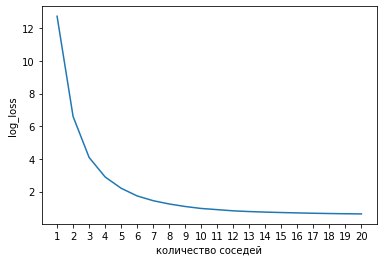

In [61]:
plt.plot(list(range(1, 21)), data_train_scores)
plt.xticks(list(range(1, 21)))
plt.xlabel("количество соседей")
plt.ylabel("log_loss")
plt.show()

In [66]:
#<тут ваш код для датасета data_ch_age_train>
data_ch_age_train_scores = []
for h in range(1, 21):
    knn_ch_age = KNeighborsClassifier(n_neighbors=h)
    knn_ch_age.fit(data_ch_age_train, y_ch_age_train)
    predicted_proba_ch_age = knn_ch_age.predict_proba(data_ch_age_val)[:, 1]
    log_loss_age_score=log_loss(y_ch_age_val, predicted_proba_ch_age)

    data_ch_age_train_scores.append(log_loss_age_score)

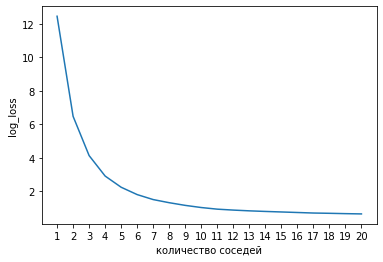

In [67]:
plt.plot(list(range(1, 21)), data_ch_age_train_scores)
plt.xticks(list(range(1, 21)))
plt.xlabel("количество соседей")
plt.ylabel("log_loss")
plt.show()

Сделайте выводы -- как вы думаете, почему зависимость log_loss от k получилась такой?

In [ ]:
Потому что в лог лос есть обратная пропорциональность к количеству соседей? 
Чем больше расстояние ближайших соседей, тем меньше ошибка

<ваши выводы опишите здесь>

P.S. Если вы посмотрите на лидерборд в соревновании к этому датасету, то увидите, что участники достигли значений log_loss гораздо меньших, чем получилось у нас. Но не переживайте -- мы особо не старались предобрабатывать датасет, и модель KNN -- одна из самых слабых в машинном обучении. В следующих модулях вы познакомитесь с более сильными моделями.